In [1]:
# import modules 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import re
import csv
import filters as f

In [2]:
# Path to data file in csv format
data_file = "/home/gfemer/projects/ctb-sgravel/cartagene/research/quebec_structure_936028/data/old_metadata/data_Gravel936028_2.csv"
# Path to metadata info file in xlsx format
catalog_file = '/home/gfemer/projects/ctb-sgravel/cartagene/research/quebec_structure_936028/data/old_metadata/COMBINED_CATALOG_v2_9_6 - JUIL2020_0.xlsx'

# Relevant fields
fields = "ethnic,country,BIRTHYEAR,IMMIGRATION"

# Path to phase2 country other codes
phase2_file = "/home/gfemer/storage/Cartagene/databases/phase2_country.txt"
# Path to ISO county code file
iso_file = "/home/gfemer/storage/Cartagene/databases/ISO_country_codes_edited_cartagene.txt"

In [8]:
# Relevant filter and sample
filters = "HAITI"
samplepops1 = "FRANCE,SPAIN"
samplepops2 = "CONGO_DEMOCRATIC_REPUBLIC,CAMEROON,COTE_DIVOIRE"
samplen = 50
# out = "~/storage/Cartagene/data/gsa_cartagene/gsa_merged_hg38.Haiti_FC.keep"
out = "/home/gfemer/storage/Cartagene/Haiti/panel/gsa_merged_hg38.Haiti_FC.r2.keep"

filters = filters.split(",")
samplepops1 = samplepops1.split(",")
samplepops2 = samplepops2.split(",")
fields = "file111,PHASE,SEXE,SEX_BIRTH"+fields

In [9]:
data1 = f.parse_metadata(data_file,catalog_file,fields,drop_other=False)
data = f.correct_iso(data1,phase2_file,iso_file)

Reading metadata


Finished reading data


Sample pops, if n>50, use sample, else filter by value

In [9]:
Sample_pops = f.sample_pop(data,samplepops1,strict=True,avoid=filters)

/lustre06/project/6068353/gfemer/Cartagene/Flagship/scripts/filters.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled.loc[:,"NO_GRANDPARENTS"] = (sampled.filter(regex=re.compile(expression, re.IGNORECASE)).isin([pop])).sum(1) # Number of grandparents in that country
/lustre06/project/6068353/gfemer/Cartagene/Flagship/scripts/filters.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled.loc[:,"NO_GRANDPARENTS"] = (sampled.filter(regex=re.compile(expression, re.IGNORECASE)).isin([pop])).su

In [10]:
data_AFR = f.filter_by_value(data,samplepops2)

# Find columns with 'MOTHERS' or 'FATHERS' in their names
filtered_columns = [col for col in data.columns if 'MOTHERS' in col or 'FATHERS' in col]

data_AFR['NGP_COUNTRY_INTEREST'] = data_AFR[filtered_columns].isin(samplepops2).sum(axis=1)
print("Total individuals extracted with AFR ancestry ", len(data_AFR))

# Extract individuals with total ancestry
data_AFR = data_AFR[data_AFR.NGP_COUNTRY_INTEREST == 4].copy()
data_AFR['Population'] = data_AFR.MOTHERS_MOTHER_COUNTRY_BIRTH

print("Total number of AFR individuals retained: ", len(data_AFR))

print(data_AFR.Population.value_counts())

Total individuals extracted with AFR ancestry  87
Total number of AFR individuals retained:  60
CONGO_DEMOCRATIC_REPUBLIC    25
CAMEROON                     22
COTE_DIVOIRE                 13
Name: Population, dtype: int64


Filter Haiti

In [10]:
d = f.filter_by_value(data,filters)

In [11]:
d.phase.value_counts()

PHASE A                  251
PHASE B - SECOND WAVE     69
Name: phase, dtype: int64

In [12]:
d

,file111,phase,BIRTHYEAR,sexe,AGE_IMMIGRATION,AGE_IMMIGRATION_AGE,AGE_IMMIGRATION_YEAR,COUNTRY_BIRTH,MOTHER_COUNTRY_BIRTH,FATHER_COUNTRY_BIRTH,MOTHERS_MOTHER_COUNTRY_BIRTH,MOTHERS_FATHER_COUNTRY_BIRTH,FATHERS_MOTHER_COUNTRY_BIRTH,FATHERS_FATHER_COUNTRY_BIRTH
171,11126105,PHASE A,1969,FEMALE,YEAR,NA,1995,HAITI,HAITI,HAITI,HAITI,HAITI,FRANCE,NO ANSWER
176,11115335,PHASE A,1957,FEMALE,AGE,36,NA,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI
266,11124835,PHASE A,1961,MALE,YEAR,NA,1995,HAITI,HAITI,HAITI,HAITI,HAITI,NO ANSWER,NO ANSWER
372,11136128,PHASE A,1965,MALE,YEAR,NA,1993,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI
454,11132379,PHASE A,1940,FEMALE,YEAR,NA,1971,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI,NO ANSWER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28122,11138665,PHASE A,1967,FEMALE,YEAR,NA,1995,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI
28445,11103656,PHASE A,1942,MALE,AGE,28,NA,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI
28763,11126870,PHASE A,1966,MALE,YEAR,NA,1984,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI,HAITI
28950,11124886,PHASE A,1957,MALE,YEAR,NA,1977,HAITI,HAITI,SYRIAN_ARAB_RAPUBLIC,NO ANSWER,HAITI,SYRIAN_ARAB_RAPUBLIC,SYRIAN_ARAB_RAPUBLIC


In [13]:
# Check for Mixed Ancestry in the grandparents
Haiti_data= pd.DataFrame()
expression='MOTHERS|FATHERS'

NA_data_all = f.filter_by_value(data,filters)

for country in filters:
    datapop = f.filter_by_value(NA_data_all,[country]) # subset of people with that country value
    datapop.loc[:,"NO_GRANDPARENTS"] = (datapop.filter(regex=re.compile(expression, re.IGNORECASE)).isin([country])).sum(1) # Number of grandparents in that country
    datapop['Population'] = [country+"_CAD" if i==4 else country+"_CAD_PA" if i > 0 else None for i in datapop.loc[:,'NO_GRANDPARENTS']]
    datapop = datapop[datapop.NO_GRANDPARENTS != 0]
    Haiti_data = pd.concat([Haiti_data,datapop])
    print(country,len(datapop))
Haiti_data = Haiti_data.dropna()
Haiti_data = Haiti_data.drop_duplicates(['file111'],keep='first')

HAITI 314


In [14]:
Haiti_data.Population.value_counts()

HAITI_CAD       270
HAITI_CAD_PA     44
Name: Population, dtype: int64

In [18]:
out = '/home/gfemer/storage/Cartagene/Flagship/Haiti/panel/gsa_merged_Haiti_EurAfr.keep'
f.write_keep(out,Haiti_data[Haiti_data.Population == "HAITI_CAD"],Sample_pops,data_AFR)

Questionaire data exploration

In [18]:
# Convert 'BIRTHYEAR' to numeric
Haiti_data['BIRTHYEAR'] = pd.to_numeric(Haiti_data['BIRTHYEAR'], errors='coerce')  # 'coerce' converts non-numeric values to NaN
Haiti_data['AGE_IMMIGRATION_YEAR'] = pd.to_numeric(Haiti_data['AGE_IMMIGRATION_YEAR'], downcast = 'integer', errors='coerce')  # 'coerce' converts non-numeric values to NaN
Haiti_data['AGE_IMMIGRATION_AGE'] = pd.to_numeric(Haiti_data['AGE_IMMIGRATION_AGE'], downcast = 'integer', errors='coerce')  # 'coerce' converts non-numeric values to NaN

In [19]:
Haiti_data.loc[Haiti_data['AGE_IMMIGRATION'] == 'AGE','AGE_IMMIGRATION_YEAR'] = Haiti_data.loc[Haiti_data['AGE_IMMIGRATION'] == 'AGE','AGE_IMMIGRATION_AGE'] + Haiti_data.loc[Haiti_data['AGE_IMMIGRATION'] == 'AGE','BIRTHYEAR']

In [20]:
Haiti_fa = Haiti_data[Haiti_data.Population == "HAITI_CAD"]

In [10]:
Haiti_fa.groupby(["Population","COUNTRY_BIRTH"])[['BIRTHYEAR','AGE_IMMIGRATION_YEAR']].agg(['count','mean','median','std']).round(2)

BIRTHYEAR                         \
                             count     mean  median   std   
Population COUNTRY_BIRTH                                    
HAITI_CAD  CANADA                2  1959.00  1959.0  1.41   
           HAITI               267  1957.53  1959.0  8.84   
           UNITED_STATES         1  1970.00  1970.0   NaN   

                         AGE_IMMIGRATION_YEAR                          
                                        count     mean  median    std  
Population COUNTRY_BIRTH                                               
HAITI_CAD  CANADA                           0      NaN     NaN    NaN  
           HAITI                          266  1985.49  1983.5  12.62  
           UNITED_STATES                    1  2010.00  2010.0    NaN

In [97]:
(Haiti_fa.AGE_IMMIGRATION_YEAR - Haiti_fa.BIRTHYEAR).agg(['count','mean','median','std'])

count     267.000000
mean       27.988764
median     28.000000
std         9.897400
dtype: float64

<AxesSubplot:ylabel='Count'>

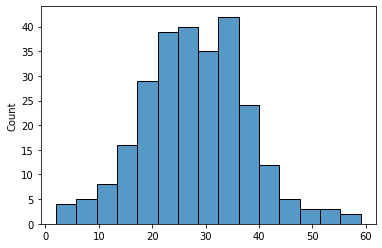

In [100]:
sns.histplot((Haiti_fa.AGE_IMMIGRATION_YEAR - Haiti_fa.BIRTHYEAR))

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='BIRTHYEAR', ylabel='Count'>

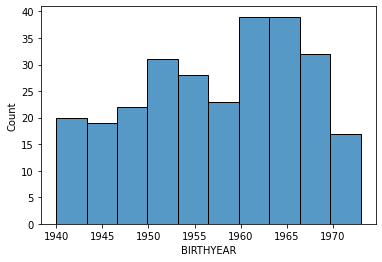

In [22]:
sns.histplot(Haiti_fa.BIRTHYEAR)

In [29]:
print(np.mean(Haiti_fa.BIRTHYEAR)
np.std(Haiti_fa.BIRTHYEAR)
np.var(Haiti_fa.BIRTHYEAR)

77.56126200274348

<AxesSubplot:xlabel='AGE_IMMIGRATION_YEAR', ylabel='Count'>

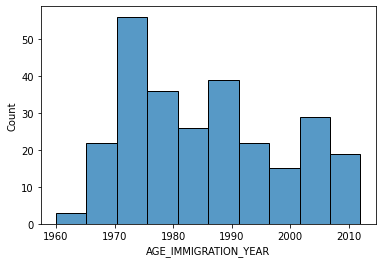

In [79]:
sns.histplot(Haiti_fa.AGE_IMMIGRATION_YEAR)

In [ ]:
Haiti_fa.AGE_IMMIGRATION_YEAR.value_counts()

In [78]:
Haiti_fa.AGE_IMMIGRATION_YEAR.agg(['count','mean','median','std'])

count      267.000000
mean      1985.580524
median    1984.000000
std         12.682209
Name: AGE_IMMIGRATION_YEAR, dtype: float64

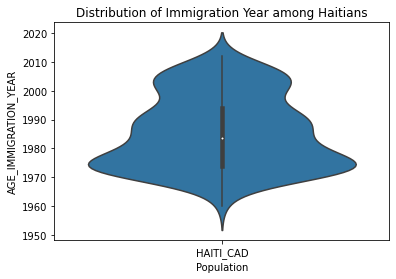

In [90]:
sns.violinplot(x='Population', y='AGE_IMMIGRATION_YEAR', data=Haiti_fa[Haiti_fa.COUNTRY_BIRTH=="HAITI"])
plt.title('Distribution of Immigration Year among Haitians')
plt.savefig("ViolinPlot_Haiti_by_immigrationyear.jpg")

In [22]:
Haiti_fa.groupby("sexe")[['BIRTHYEAR','AGE_IMMIGRATION_YEAR']].agg(['count','mean','std']).round(2)

BIRTHYEAR                AGE_IMMIGRATION_YEAR                
           count     mean   std                count     mean    std
sexe                                                                
FEMALE       135  1957.56  8.40                  135  1984.49  12.56
MALE         135  1957.61  9.26                  132  1986.70  12.76

<AxesSubplot:xlabel='sexe', ylabel='AGE_IMMIGRATION_YEAR'>

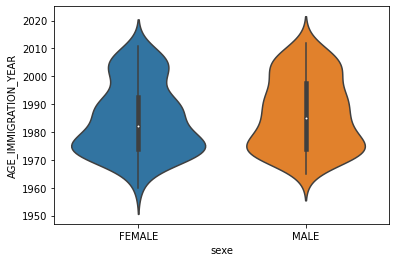

In [25]:
sns.violinplot(x='sexe', y='AGE_IMMIGRATION_YEAR', data=Haiti_fa[Haiti_fa.COUNTRY_BIRTH=="HAITI"])

Plot Proportions of European ancestry

In [27]:
proportions_file="/home/gfemer/storage/Cartagene/Flagship/Haiti/admixture-final-1kgp_unrelated/gsa_omni1kgp_hg38-HaitiAdmx.unrelated.EURproportions-Haiti-K3.txt"
proportions = pd.read_table(proportions_file,sep=" ",names=['Population','file111','Proportion'])

In [28]:
proportions['file111'] = proportions['file111'].astype(str)
Haiti_data['file111'] = Haiti_data['file111'].astype(str)

In [29]:
result_df = pd.merge(proportions, Haiti_fa[['file111', 'AGE_IMMIGRATION_YEAR']], on='file111', how='inner')

<AxesSubplot:xlabel='Proportion', ylabel='Count'>

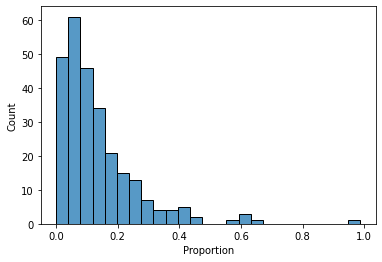

In [31]:
import seaborn as sns 
#sns.pointplot(result_df,x='AGE_IMMIGRATION_YEAR',y='Proportion')
sns.histplot(result_df.Proportion)